## Visualizing Food Insecurity with Pandas and Pixie Dust

This notebook has been adapted from the Food Insecurity code pattern https://developer.ibm.com/patterns/create-visualizations-to-understand-food-insecurity/.

For this particular journey, food insecurity throughout the US is focused on. Low access, diet-related diseases, race, poverty, geography and other factors are considered by using open government data. For some context, this problem is a more and more relevant problem for the United States as obesity and diabetes rise and two out of three adult Americans are considered obese, one third of American minors are considered obsese, nearly ten percent of Americans have diabetes and nearly fifty percent of the African American population have heart disease. Even more, cardiovascular disease is the leading global cause of death, accounting for 17.3 million deaths per year, and rising. Native American populations more often than not do not have grocery stores on their reservation... and all of these trends are on the rise. The problem lies not only in low access to fresh produce, but food culture, low education on healthy eating as well as racial and income inequality.

The government data used in this journey is aggregated from the original, government data from the US Bureau of Labor Statistics https://www.bls.gov/cex/ and The United States Department of Agriculture https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/.


The aggregated data is hosted here - https://ibm.box.com/s/058spwk7hvo8z2xguzr5jxsdjssbbvdl

## Import Dependencies

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

To get the data and load it into a pandas DataFrame:

1. Download the dataset as a CSV from this link [https://ibm.box.com/s/058spwk7hvo8z2xguzr5jxsdjssbbvdl] to your computer. 
1. From this notebook, click the Find and Add Data icon on the top right (the icon looks like a 0100) and then uploading the file you downloaded in step 1 in this panel.
1. Click in the next cell and then choose Insert to code > Insert pandas DataFrame from below the file name and then run the cell. 
1. The generated code will read the csv file into a data frame variable named df_data_#. Where the # may vary. Be Sure to change the inserted variable name to df_data_1 if it is not named that automatically.
1. Run the cell.


In [3]:
# With your cursor in this cell, insert the code to read the dataset into a DataFrame as instructed in step 3)
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_a38c4fbf0e6c4f338155445be4a4c8e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TcJhuXGj7ST596Rx98VSOy2TXel0e8F_KhyeGAza6AMs',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a38c4fbf0e6c4f338155445be4a4c8e0.get_object(Bucket='dataprocessingunderstanding-donotdelete-pr-ykr8wbnxcpkfq5',Key='dietrelatediseases-usbls-wsda.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (208,209,211,214) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
0,0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
1,1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
2,2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
3,3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
4,4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432


In [4]:
try:
    disease_df = df_data_1
except NameError as e:
    print('Error: Setup is incorrect or incomplete.\n')
    print('Follow the instructions to insert the pandas DataFrame above, and edit to')
    print('make the generated df_data_# variable match the variable used here.')
    raise

## Explore and Clean Dataset

In [5]:
# First lets see what columns we have in our data set. A mapping of the column codes to description 
# is provided in the Dietrelateddisease_VariableMap.xlsx file 
disease_df.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_CHILD10', 'PCT_LACCESS_CHILD10',
       ...
       'CES_WATRPSCQ_std', 'CES_WATRPSPQ_std', 'CES_WELFAREB_std',
       'CES_WELFAREI_std', 'CES_WINDOWAC_std', 'CES_WOMGRLCQ_std',
       'CES_WOMGRLPQ_std', 'CES_WOMSIXCQ_std', 'CES_WOMSIXPQ_std',
       'CES_YRBUILT_std'],
      dtype='object', length=1244)

In [6]:
# We can use pandas to look at the statistics of our dataset.
disease_df.describe()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
count,3262.000000,3262.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,2763.000000,2763.000000,1947.000000,2763.000000,2763.0,2763.000000,2763.000000,2763.000000,2763.000000,2681.000000
mean,1630.500000,31457.332925,20130.485391,23.540300,5541.030150,8.359188,4953.676750,5.502879,2677.821025,3.909622,...,69.546993,101.138452,1.353149,10.882370,0.0,121.350532,212.334189,106.390781,186.085924,26.350572
std,941.802616,16375.524971,51254.806435,20.231676,13849.378974,8.212651,13155.181390,4.875273,6519.993517,4.212330,...,10.964508,17.466676,0.890585,4.850197,0.0,26.669356,50.179029,28.662127,48.519222,6.232962
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.659691,54.544706,0.000000,0.000000,0.0,48.651029,112.399808,45.121029,80.583433,14.443555
25%,815.250000,19025.500000,1667.390111,10.870622,594.754831,3.432434,365.454006,2.402381,276.850179,1.571591,...,60.690423,93.305506,0.707107,9.020905,0.0,100.291943,180.070768,84.852601,157.478670,23.432432
50%,1630.500000,30038.000000,4111.042854,19.632762,1493.722478,6.144888,943.385306,4.439335,677.791776,2.821919,...,69.896994,99.236682,1.453463,10.442407,0.0,118.376545,209.956745,103.297270,180.653472,24.837942
75%,2445.750000,47006.500000,12919.813770,29.573087,4575.061517,10.318850,3005.860479,6.957564,1857.917995,4.505219,...,75.516632,110.731651,2.065591,14.550488,0.0,135.030235,232.887939,119.926255,217.244568,28.118544
max,3261.000000,72153.000000,886068.668386,100.000001,292541.789025,72.274456,260308.794094,34.015595,78922.918719,29.208633,...,106.552781,153.465998,2.638870,22.275774,0.0,200.919016,376.288907,189.674002,363.251444,54.306640


In [7]:
# To see general information, we can get some metrics for the entire dataset as follows:
disease_df.max()
disease_df.min()
disease_df.std()

array([ 33.7696573 ,  19.3184726 ,  20.84097171, ...,  20.22041443,
        10.91540662,  17.20994869])

In [8]:
# Or we can get information on a specific column in the dataset.
disease_df['PCT_DIABETES_ADULTS10'].unique()

array([ 11.8,  14.2,  11.1,  14. ,  17.5,  16. ,  13.9,  15. ,  13.6,
        12.5,  17.3,  15.7,  14.7,  13.3,  12.6,  13.7,  17.7,  15.6,
        14.8,  13. ,  15.1,  12.9,  12.3,  13.2,  14.1,  15.8,  19.4,
        16.3,  14.3,  13.4,  11.7,  13.8,   9.8,  10.7,  19.3,  16.6,
        17.4,  12.1,  11.9,  18.2,  14.6,  13.5,   8.9,  10.5,  18.1,
         nan,   7.7,   6.7,   7. ,   8.3,   6.8,   8.2,   6.1,   6.3,
         7.2,   8.4,   7.8,   7.6,   7.5,   8.6,  14.9,   9. ,   7.3,
        11.2,  10.8,   9.3,   8. ,  12. ,  11.6,   7.9,  10.4,   6.4,
         9.7,  14.4,   8.7,  11.4,  15.2,  11.5,  12.7,  10.2,  12.2,
        11. ,  12.4,  10.9,  14.5,  13.1,  15.9,  12.8,   8.1,   9.6,
         9.1,   8.8,   7.4,  10. ,   5.5,   9.4,   6.6,   6.9,   9.5,
         9.2,   8.5,   6. ,   7.1,   6.5,   4.7,   5.9,   4.1,   3.6,
         5.1,   5. ,   4.3,   5.6,   4.9,   5.2,   4.8,   3.3,   3.9,
        10.3,  10.1,   9.9,  11.3,  15.3,  10.6,  16.2,  16.7,  16.4,
         5.8,   5.4,

In [9]:
disease_df['FOODINSEC_10_12'].unique()

array([ 17.9,   nan,  12.1,  14.9,  19.7,  15.6,  14.1,  13.4,  11.6,
        12. ,  14.8,  16.9,  14. ,  14.3,  13. ,  13.5,  12.6,  14.4,
        15.7,  11.4,  10.6,  20.9,  16.7,  16.6,   9.9,  15.2,  13.2,
        17. ,   8.7,  16.1,  15.3,  13.6,  12.3,  15.4,  12.9,  16.2,
        18.4,  12.7,   9.2,  14.6,  14.2,  11.2,  13.8])

In [10]:
# Pandas has the ability to show correlation between values in the dataset.
disease_df.corr()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
Unnamed: 0,1.000000,0.988077,-0.044663,0.046794,-0.038625,0.022513,-0.034837,0.042818,-0.066165,0.067212,...,-0.090276,-0.029702,0.494726,-0.130957,NaN,-0.041758,0.060190,0.040847,0.054743,0.124638
FIPS,0.988077,1.000000,-0.041895,0.043318,-0.035782,0.017944,-0.032581,0.039247,-0.062296,0.065611,...,-0.108750,-0.032423,0.493055,-0.132797,NaN,-0.057590,0.050669,0.016636,0.042205,0.129827
LACCESS_POP10,-0.044663,-0.041895,1.000000,0.053159,0.920129,-0.051210,0.992586,0.078428,0.951078,-0.036140,...,0.211475,0.189190,0.110039,0.112132,NaN,0.141888,0.163084,0.141098,0.158161,0.030863
PCT_LACCESS_POP10,0.046794,0.043318,0.053159,1.000000,0.058148,0.901876,0.051701,0.960261,0.059648,0.919669,...,0.078081,0.073386,-0.028346,0.029399,NaN,0.008136,0.135848,0.034067,0.145976,-0.130053
LACCESS_LOWI10,-0.038625,-0.035782,0.920129,0.058148,1.000000,0.014073,0.934088,0.087289,0.839824,-0.033301,...,0.152635,0.158271,0.097096,0.078706,NaN,0.080647,0.110861,0.078411,0.109655,-0.043724
PCT_LACCESS_LOWI10,0.022513,0.017944,-0.051210,0.901876,0.014073,1.000000,-0.046528,0.890063,-0.049752,0.826947,...,-0.015167,0.013740,-0.044804,-0.032070,NaN,-0.043802,0.052483,-0.036339,0.054818,-0.179561
LACCESS_CHILD10,-0.034837,-0.032581,0.992586,0.051701,0.934088,-0.046528,1.000000,0.086029,0.914988,-0.043977,...,0.194859,0.173740,0.111565,0.104240,NaN,0.136906,0.162738,0.135360,0.156621,0.017344
PCT_LACCESS_CHILD10,0.042818,0.039247,0.078428,0.960261,0.087289,0.890063,0.086029,1.000000,0.069079,0.823482,...,0.053151,0.050514,-0.042987,0.020719,NaN,0.006240,0.133672,0.025514,0.138429,-0.152206
LACCESS_SENIORS10,-0.066165,-0.062296,0.951078,0.059648,0.839824,-0.049752,0.914988,0.069079,1.000000,0.004796,...,0.243962,0.222335,0.093470,0.127424,NaN,0.137348,0.147420,0.138918,0.145248,0.049154
PCT_LACCESS_SENIORS10,0.067212,0.065611,-0.036140,0.919669,-0.033301,0.826947,-0.043977,0.823482,0.004796,1.000000,...,0.087898,0.079362,-0.033220,0.037170,NaN,-0.042446,0.091596,-0.005059,0.112250,-0.088942


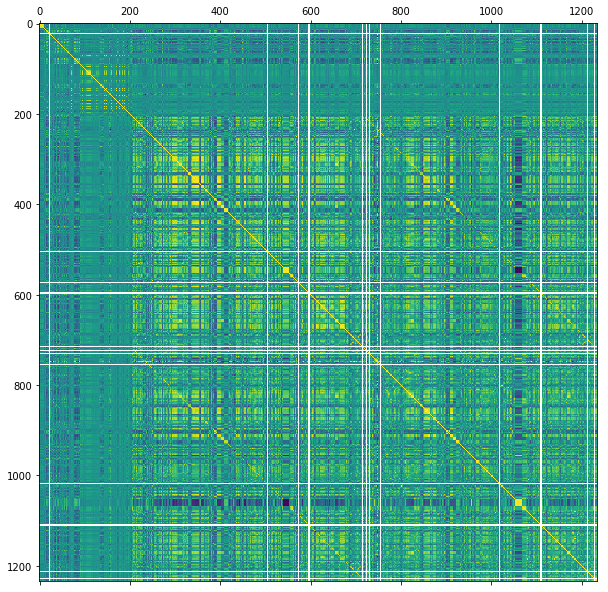

In [13]:
# With over 1200 columns, reading the correlation values in table format can be hard. 
# Lets use matplotlib to visualize this matrix. 
plt.figure(figsize=(10,10))
plt.matshow(disease_df.corr(), fignum=1)


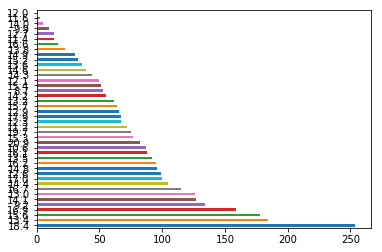

In [15]:
# Plot counts of a specified column using Pandas
disease_df.FOODINSEC_10_12.value_counts().plot(kind='barh')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


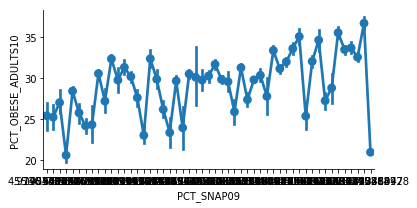

In [16]:
# Bar plot example
sns.factorplot("PCT_SNAP09", "PCT_OBESE_ADULTS10", data=disease_df,size=3,aspect=2)

## Clean Data

In [19]:
#create a dataframe of values that are most interesting to food insecurity
df_focusedvalues = disease_df[["State", "County","PCT_REDUCED_LUNCH10", "PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", "FOODINSEC_10_12", "PCT_OBESE_CHILD11", "PCT_LACCESS_POP10", "PCT_LACCESS_CHILD10", "PCT_LACCESS_SENIORS10", "SNAP_PART_RATE10", "PCT_LOCLFARM07", "FMRKT13", "PCT_FMRKT_SNAP13", "PCT_FMRKT_WIC13", "FMRKT_FRVEG13", "PCT_FRMKT_FRVEG13", "PCT_FRMKT_ANMLPROD13", "FOODHUB12", "FARM_TO_SCHOOL", "SODATAX_STORES11", "State_y", "GROC12", "SNAPS12", "WICS12", "PCT_NHWHITE10", "PCT_NHBLACK10", "PCT_HISP10", "PCT_NHASIAN10", "PCT_65OLDER10", "PCT_18YOUNGER10", "POVRATE10", "CHILDPOVRATE10"]]

In [20]:
#remove NaNs and 0s
df_focusedvalues = df_focusedvalues[(df_focusedvalues != 0).all(1)]
df_focusedvalues = df_focusedvalues.dropna(how='any')

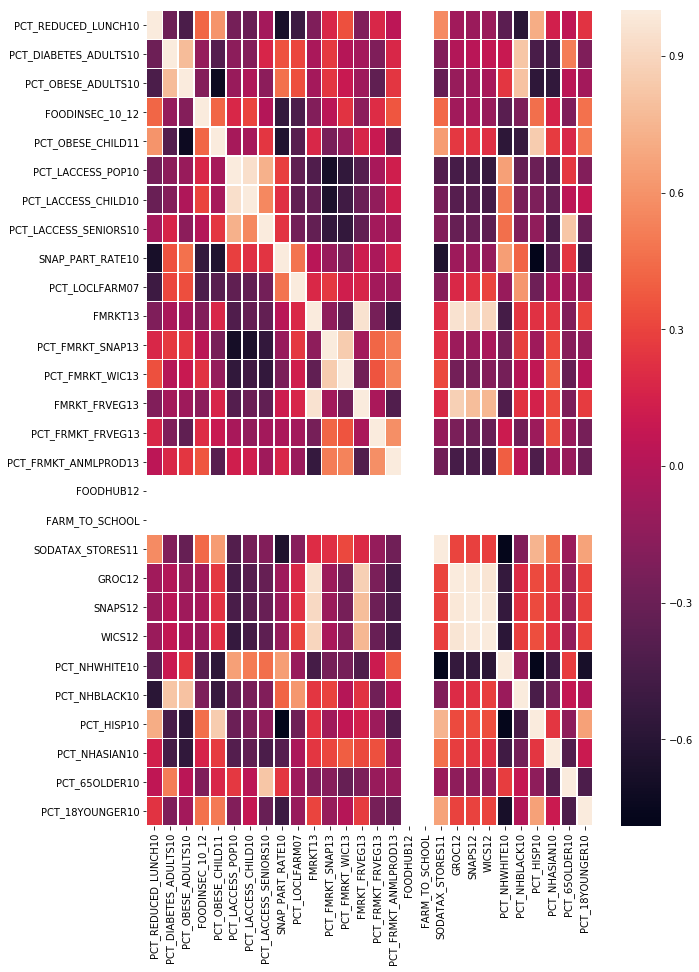

In [26]:
#look at heatmap of correlations with the dataframe to see what we should visualize
corr = df_focusedvalues.corr()
fig, ax = plt.subplots(figsize=(10,15))         

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.5, ax=ax)

#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

We can immediately see that a fair amount of strong correlations and relationships exist. Some of these include 18 and younger and Hispanic, an inverse relationship between Asian and obese, a correlation between sodatax and Hispanic, African American and obesity as well as food insecurity, sodatax and obese minors, farmers markets and aid such as WIC and SNAP, obese minors and reduced lunches and a few more.

Let's try and plot some of these relationships with seaborn.

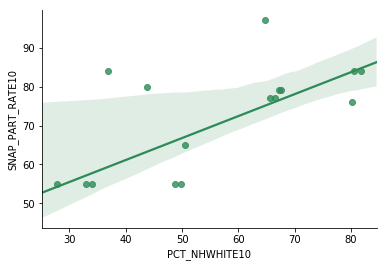

In [22]:
#Percent of the population that is white vs SNAP aid participation (positive relationship)
sns.regplot("PCT_NHWHITE10", "SNAP_PART_RATE10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

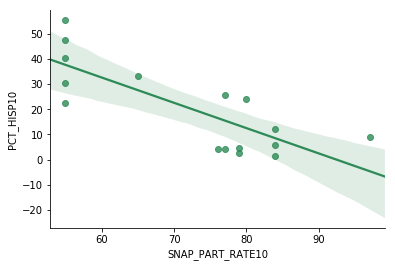

In [23]:
#Percent of the population that is Hispanic vs SNAP aid participation (negative relationship)
sns.regplot("SNAP_PART_RATE10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

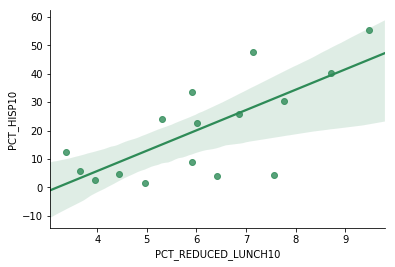

In [24]:
#Eligibility and use of reduced lunches in schools vs percent of the population that is Hispanic (positive relationship)
sns.regplot("PCT_REDUCED_LUNCH10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

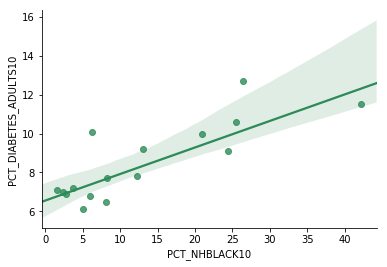

In [27]:
#Percent of the population that is black vs percent of the population with diabetes (positive relationship)
sns.regplot("PCT_NHBLACK10", "PCT_DIABETES_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

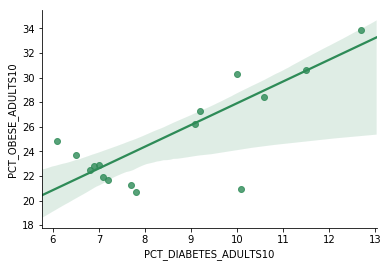

In [28]:
#Percent of population with diabetes vs percent of population with obesity (positive relationship)
sns.regplot("PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

With these simple regression plots we were able to glean from our data information such as in 2010, non-hispanic whites were highly correlated with the use of the SNAP program, or food stamps. We see that the hispanic population is not highly correlated in this time frame. This could be for a variety of reasons including eligibility, reporting, varying policies and use of the program. In our next graphs we see that in 2010, the percentage of the population who were black were highly correlated with diabetes. Next, we see that diabetes and obesity are highly correlated. These graphs do not represent any statistical significance, but they can help us understand and familiarize ourselves with the data.

### Now, let's visualize with Pixie Dust.

Now that we've gained some initial insights, let's try out a different tool: Pixie Dust!

As you can see in the notebook below, to activate Pixie Dust, we just import it and then write:

 ```display(your_dataframe_name)```
 
After doing this your dataframe will show up in a column-row table format. To visualize your data, you can click the chart icon at the top left (looks like an arrow going up). From there you can choose from a variety of visuals. Once you select the type of chart you want, you can then select the variables you want to showcase. It's worth playing around with this to see how you can create the most effective visualizations for your audience. The notebook below showcases a couple options such as scatterplots, bar charts, line charts, and histograms.

In [29]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [30]:
!pip install --user --upgrade pixiedust

Requirement already up-to-date: pixiedust in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.1.17)
Requirement not upgraded as not directly required: astunparse in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (1.5.0)
Requirement not upgraded as not directly required: colour in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (0.1.5)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (2.18.4)
Requirement not upgraded as not directly required: markdown in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (2.6.9)
Requirement not upgraded as not directly required: lxml in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (4.1.0)
Requirement not upgraded as not directly required: mpld3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust) (0.3)
Requirement not upgraded as


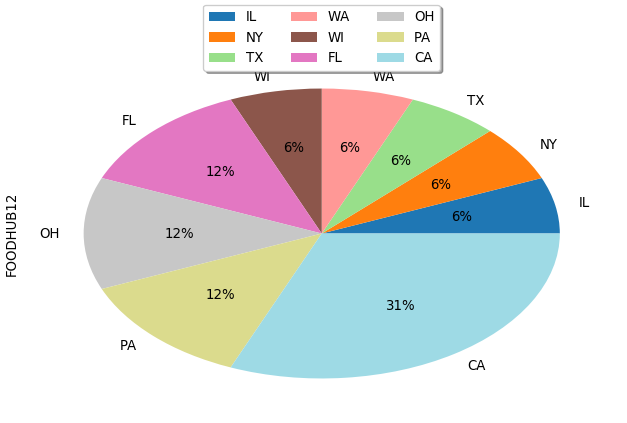

In [32]:
#looking at the dataframe table. Pixie Dust does this automatically, but to find it again you can click the table icon.
#Just to give some examples of what you can do with the data, I've created a pie chart of percent of food hubs in the country by state.
display(df_focusedvalues)


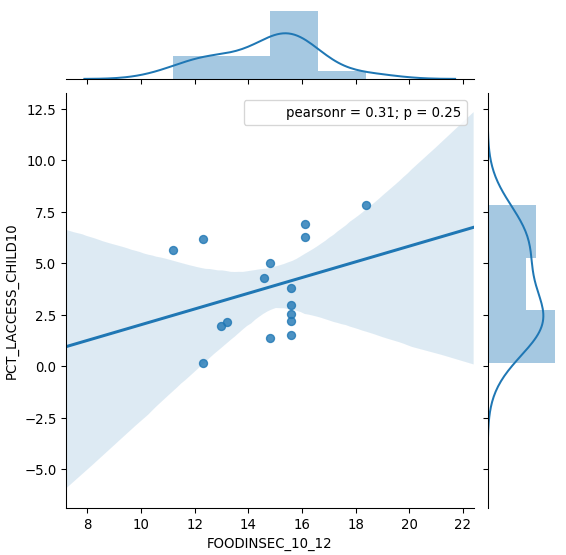

In [33]:
#using seaborn in Pixie Dust to look at Food Insecurity and the Percent of the population that is black in a scatter plot
display(df_focusedvalues)

In [34]:
#using matplotlib in Pixie Dust to view Food Insecurity by state in a bar chart
display(df_focusedvalues)

In [35]:
#using bokeh in Pixie Dust to view the percent of the population that is black vs the percent of the population that is obese in a line chart
display(df_focusedvalues)


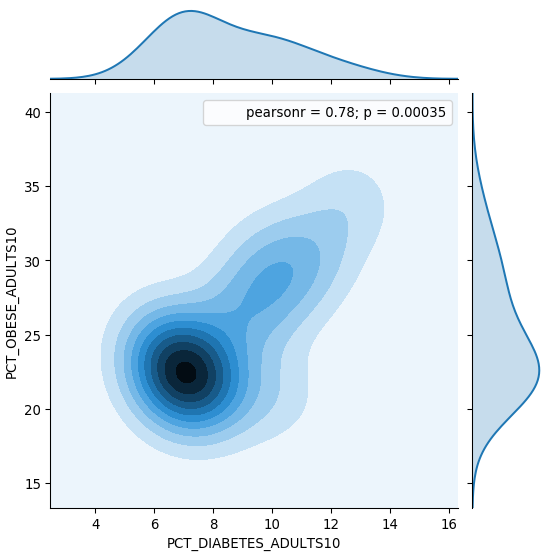

In [ ]:
#using seaborn in Pixie Dust to view obesity vs diabetes in a scatterplot
display(df_focusedvalues)

In [ ]:
#using matplotlib in Pixie Dust to view childhood obesity vs reduced school lunches in a scatterplot
display(df_focusedvalues)